In [47]:
import sympy as sp

def generate_matrix(n):
    variables = sp.symbols(f'x0:{n}')
    matrix = sp.Matrix(n, n, lambda i, j: 
        variables[i] if j % 2 == 0 and j < 4 else 
        (1 - variables[i] if j < 4 else sp.symbols(f'M{i}{j}')))
    return matrix

def compute_determinant(n):
    matrix = generate_matrix(n)
    determinant = matrix.det()
    return determinant

for n in range (4,11):
    det_value = compute_determinant(n)
    print(f"Determinant for {n}x{n} matrix: {det_value}")

Determinant for 4x4 matrix: 0
Determinant for 5x5 matrix: 0
Determinant for 6x6 matrix: 0
Determinant for 7x7 matrix: 0
Determinant for 8x8 matrix: 0
Determinant for 9x9 matrix: 0
Determinant for 10x10 matrix: 0


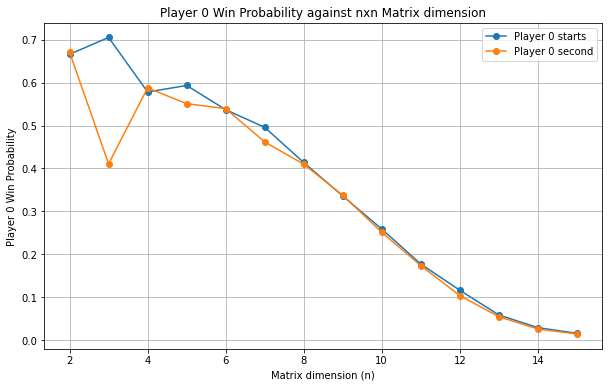

In [48]:
import numpy as np
import random
import matplotlib.pyplot as plt

def play_random_matrix_game(matrix_size, starting_player=0):
    game_matrix = np.zeros((matrix_size, matrix_size), dtype=int)
    all_possible_moves = [(row, col) for row in range(matrix_size) for col in range(matrix_size)]
    random.shuffle(all_possible_moves)
    
    for turn in range(len(all_possible_moves)):
        row, col = all_possible_moves[turn]
        if (turn + starting_player) % 2 == 0:
            current_player = 0 
        else:
            current_player = 1
        game_matrix[row, col] = current_player
    
    return np.linalg.det(game_matrix) == 0

def calculate_win_rates(matrix_size, game_count, starting_player):
    player_0_wins = sum(play_random_matrix_game(matrix_size, starting_player) for _ in range(game_count))
    player_1_wins = game_count - player_0_wins
    
    return player_0_wins / game_count, player_1_wins / game_count

def show_graph(max_matrix_size, game_count):
    matrix_sizes = list(range(2, max_matrix_size + 1))
    player_0_wins_when_starting = []
    player_0_wins_when_second = []
    
    for size in matrix_sizes:
        win_rate_as_starter, _ = calculate_win_rates(size, game_count, 0)
        win_rate_as_second, _ = calculate_win_rates(size, game_count, 1)
        player_0_wins_when_starting.append(win_rate_as_starter)
        player_0_wins_when_second.append(win_rate_as_second)
    
    plt.figure(figsize=(10, 6))
    plt.plot(matrix_sizes, player_0_wins_when_starting, label="Player 0 starts", marker='o')
    plt.plot(matrix_sizes, player_0_wins_when_second, label="Player 0 second", marker='o')
    plt.xlabel("Matrix dimension (n)")
    plt.ylabel("Player 0 Win Probability")
    plt.title("Player 0 Win Probability against nxn Matrix dimension")
    plt.legend()
    plt.grid(True)
    plt.show()

game_count = 2500
show_graph(15, game_count)